# 프로젝트 : 다양한 OCR모델 비교하기

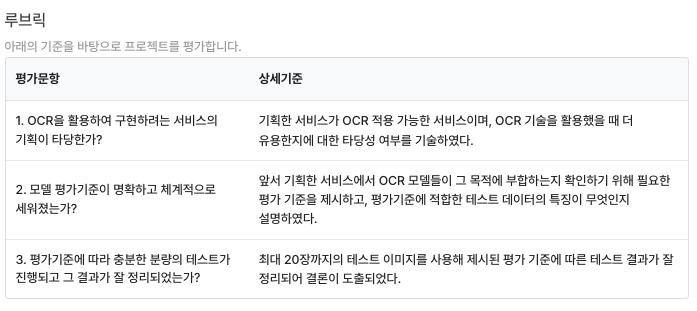

In [1]:
import keras_ocr
import pytesseract

print(keras_ocr.__version__)
print(pytesseract.__version__)
# pytesseract는 tesseract-ocr에 종속적입니다. 아래 명령어를 통해 설치해야 할 수도 있습니다.
# !sudo apt install tesseract-ocr

0.8.8
0.3.8


## Step1. 검증용 데이터셋 준비

In [94]:
# import zipfile
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import PIL
import glob
import seaborn as sns
import zipfile

In [101]:
with zipfile.ZipFile('../ocr_python/c10.zip', 'r') as zip_ref :
    zip_ref.extractall('../ocr_python/')

In [102]:
img_path = glob.glob('../ocr_python/c*.jpeg')
print('before pop :')
sorted(img_path)

before pop :


['../ocr_python/c0.jpeg',
 '../ocr_python/c1.jpeg',
 '../ocr_python/c2.jpeg',
 '../ocr_python/c3.jpeg',
 '../ocr_python/c4.jpeg',
 '../ocr_python/c5.jpeg',
 '../ocr_python/c6.jpeg',
 '../ocr_python/c7.jpeg',
 '../ocr_python/c8.jpeg',
 '../ocr_python/c9.jpeg']

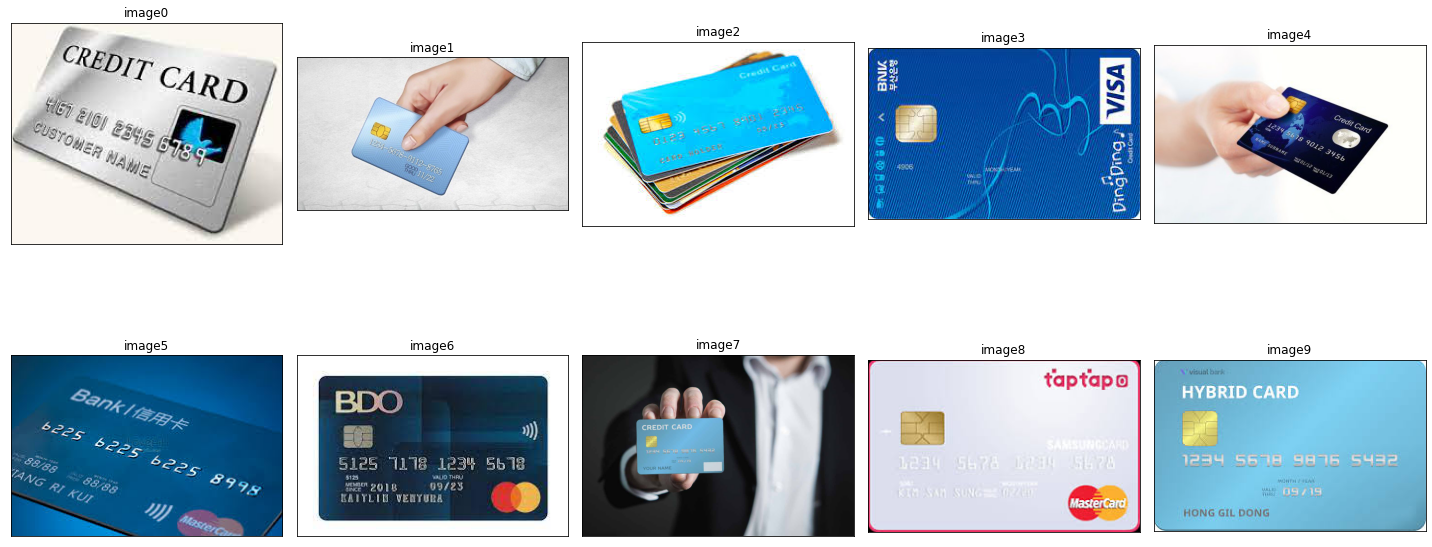

In [115]:
fig = plt.figure(figsize=(20,10))
for i, img in enumerate(img_path) :
    img = plt.imread(img)
    ax = fig.add_subplot(2,len(img_path)//2,i+1)
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)
    ax.imshow(img)
    ax.set_title(f'image{i}')
plt.tight_layout()
plt.show()

## Step2. keras-ocr, Tesseract로 테스트 진행(Google OCR API는 선택 사항)

### Google OCR API

In [ ]:
# ! pip install --upgrade google-api-python-client
# ! pip install google-cloud-vision

In [ ]:
def detect_text(path):
    """Detects text in the file."""
    from google.cloud import vision
    import io
    client = vision.ImageAnnotatorClient()

    with io.open(path, 'rb') as image_file:
        content = image_file.read()
        
    image = vision.Image(content=content)

    response = client.text_detection(image=image)
    texts = response.text_annotations
    print('Texts:')

    for text in texts:
       print('\n"{}"'.format(text.description))

    vertices = (['({},{})'.format(vertex.x, vertex.y)
                 for vertex in text.bounding_poly.vertices])

    print('bounds: {}'.format(','.join(vertices)))

    if response.error.message:
        raise Exception(
            '{}\nFor more info on error messages, check: '
            'https://cloud.google.com/apis/design/errors'.format(
                response.error.message))

In [43]:
# 로컬 환경에서는 다운받은 인증키 경로가 정확하게 지정되어 있어야 합니다. 
# 클라우드 환경에서는 무시해도 좋습니다
!ls -l $GOOGLE_APPLICATION_CREDENTIALS

import os
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] =  os.getenv('HOME')+'/aiffel/ocr_python/my_google_api_key.json'

# 입력 이미지 경로를 지정해 주세요.
# (예시) path = os.getenv('HOME')+'/aiffel/ocr_python/test_image.png'
# path = os.getenv('HOME')+'/aiffel/ocr_python/test.jpeg' 

# 위에서 정의한 OCR API 이용 함수를 호출해 봅시다.
# detect_text(path)

total 45584
drwxr-xr-x 3 root root     4096 Jan  2 05:31 '~'
-rw-r--r-- 1 root root  2618992 Dec 14 01:19  dcgan.gif
-rw-r--r-- 1 root root   678595 Dec 14 01:36 '[E-11] 인공지능으로 세상에 없던 새로운 패션 만들기.ipynb'
-rw-r--r-- 1 root root   213443 Dec 16 14:24 '[E-12] 뉴스 요약 봇 만들기.ipynb'
-rw-r--r-- 1 root root   128181 Dec 20 11:31 '[E-13] Movielens 영화 추천 .ipynb'
-rw-r--r-- 1 root root   103128 Dec 29 02:22 '[E-14] 트랜스포머로 만드는 대화형 챗봇.ipynb'
-rw-r--r-- 1 root root   563142 Jan  2 05:44 '[E-15] 문자를 읽을 수 있는 딥러닝.ipynb'
drwxr-xr-x 2 root root     4096 Jan  2 05:26  __MACOSX
-rw-r--r-- 1 root root 41399270 Dec 16 13:32  news_summary_more.csv
drwxr-xr-x 2 root root    69632 Dec 14 01:22  sample_img
-rw-r--r-- 1 root root   233567 Jan  2 05:22  t0.jpeg
-rw-r--r-- 1 root root   207917 Jan  2 05:21  t1.jpeg
-rw-r--r-- 1 root root   184548 Jan  2 05:21  t2.jpeg
-rw-r--r-- 1 root root   198825 Jan  2 05:21  t3.jpeg
drwxr-xr-x 2 root root    20480 Dec 14 01:19  train_history
drwxr-xr-x 2 root root    20480 Dec 14 

In [ ]:
fig = plt.figure(figsize=(20,20))
for i, img in enumerate(img_path) :
    img = plt.imread(img)
    ax = fig.add_subplot(len(img_path)//2,len(img_path)//2,i+1)
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)
    ax.imshow(img)
    ax.set_title(f'image{i}')
plt.tight_layout(pad=4)
plt.show()

Texts:

"AI FEEL
AIFFEL
AIFEL
AIFFEL"

"AI"

"FEEL"

"AIFFEL"

"AIFEL"

"AIFFEL"
bounds: (69,237),(543,237),(543,360),(69,360)


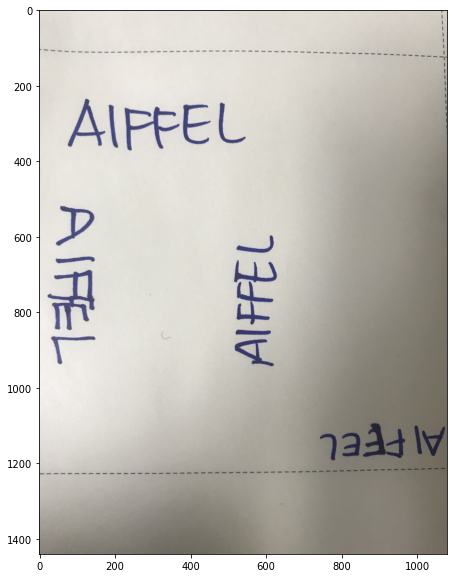

Texts:

"E
한/영
Alt
Ctrl E
AIFFEL
AIFFEL
AIFFEL"

"E"

"한"

"/"

"영"

"Alt"

"Ctrl"

"E"

"AIFFEL"

"AIFFEL"

"AIFFEL"
bounds: (90,1091),(575,1075),(578,1188),(94,1204)


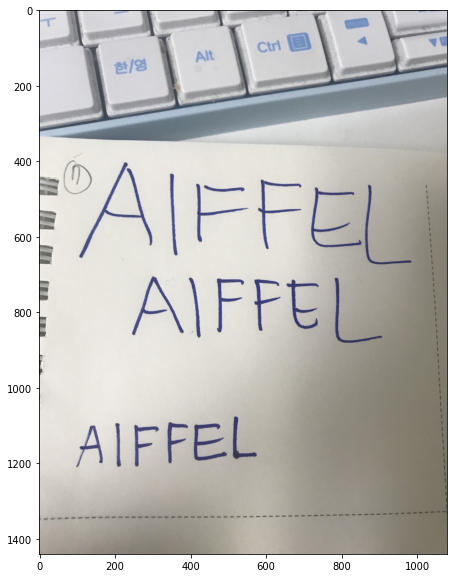

Texts:

"AIFEEL
아이펠"

"AIFEEL"

"아이"

"펠"
bounds: (585,647),(766,635),(781,864),(600,876)


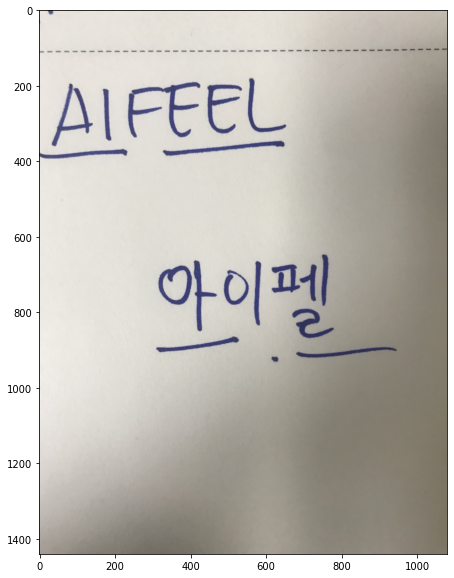

Texts:

"Page
AIFFEL
AIFFEL
AFFEL"

"Page"

"AIFFEL"

"AIFFEL"

"AFFEL"
bounds: (376,826),(777,823),(778,974),(377,977)


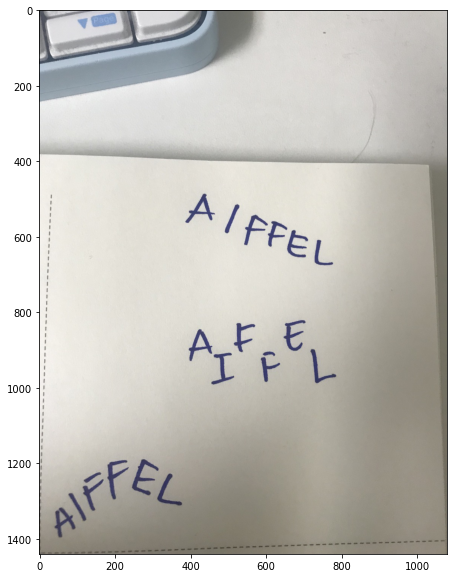

In [46]:
for i, img in enumerate(img_path) :
    detect_text(img)
    img = plt.imread(img)
    plt.imshow(img)

plt.tight_layout(pad=4)
plt.show()

### Keras OCR

In [5]:
import matplotlib.pyplot as plt
import keras_ocr

# keras-ocr이 detector과 recognizer를 위한 모델을 자동으로 다운로드받게 됩니다. 
pipeline = keras_ocr.pipeline.Pipeline()

Looking for /aiffel/.keras-ocr/craft_mlt_25k.h5
Looking for /aiffel/.keras-ocr/crnn_kurapan.h5


In [105]:
# 테스트에 사용할 이미지 url을 모아 봅니다. 추가로 더 모아볼 수도 있습니다. 
# image_urls = [
#   'https://source.unsplash.com/M7mu6jXlcns/640x460',
#   'https://source.unsplash.com/6jsp4iHc8hI/640x460',
#   'https://source.unsplash.com/98uYQ-KupiE',
#   'https://source.unsplash.com/j9JoYpaJH3A',
#   'https://source.unsplash.com/eBkEJ9cH5b4'
# ]

# images = [ keras_ocr.tools.read(url) for url in image_urls]
# prediction_groups = [pipeline.recognize([url]) for url in image_urls]

images = [ keras_ocr.tools.read(img) for img in img_path]
prediction_groups = [pipeline.recognize([img]) for img in img_path]

In [12]:
len(images)

4

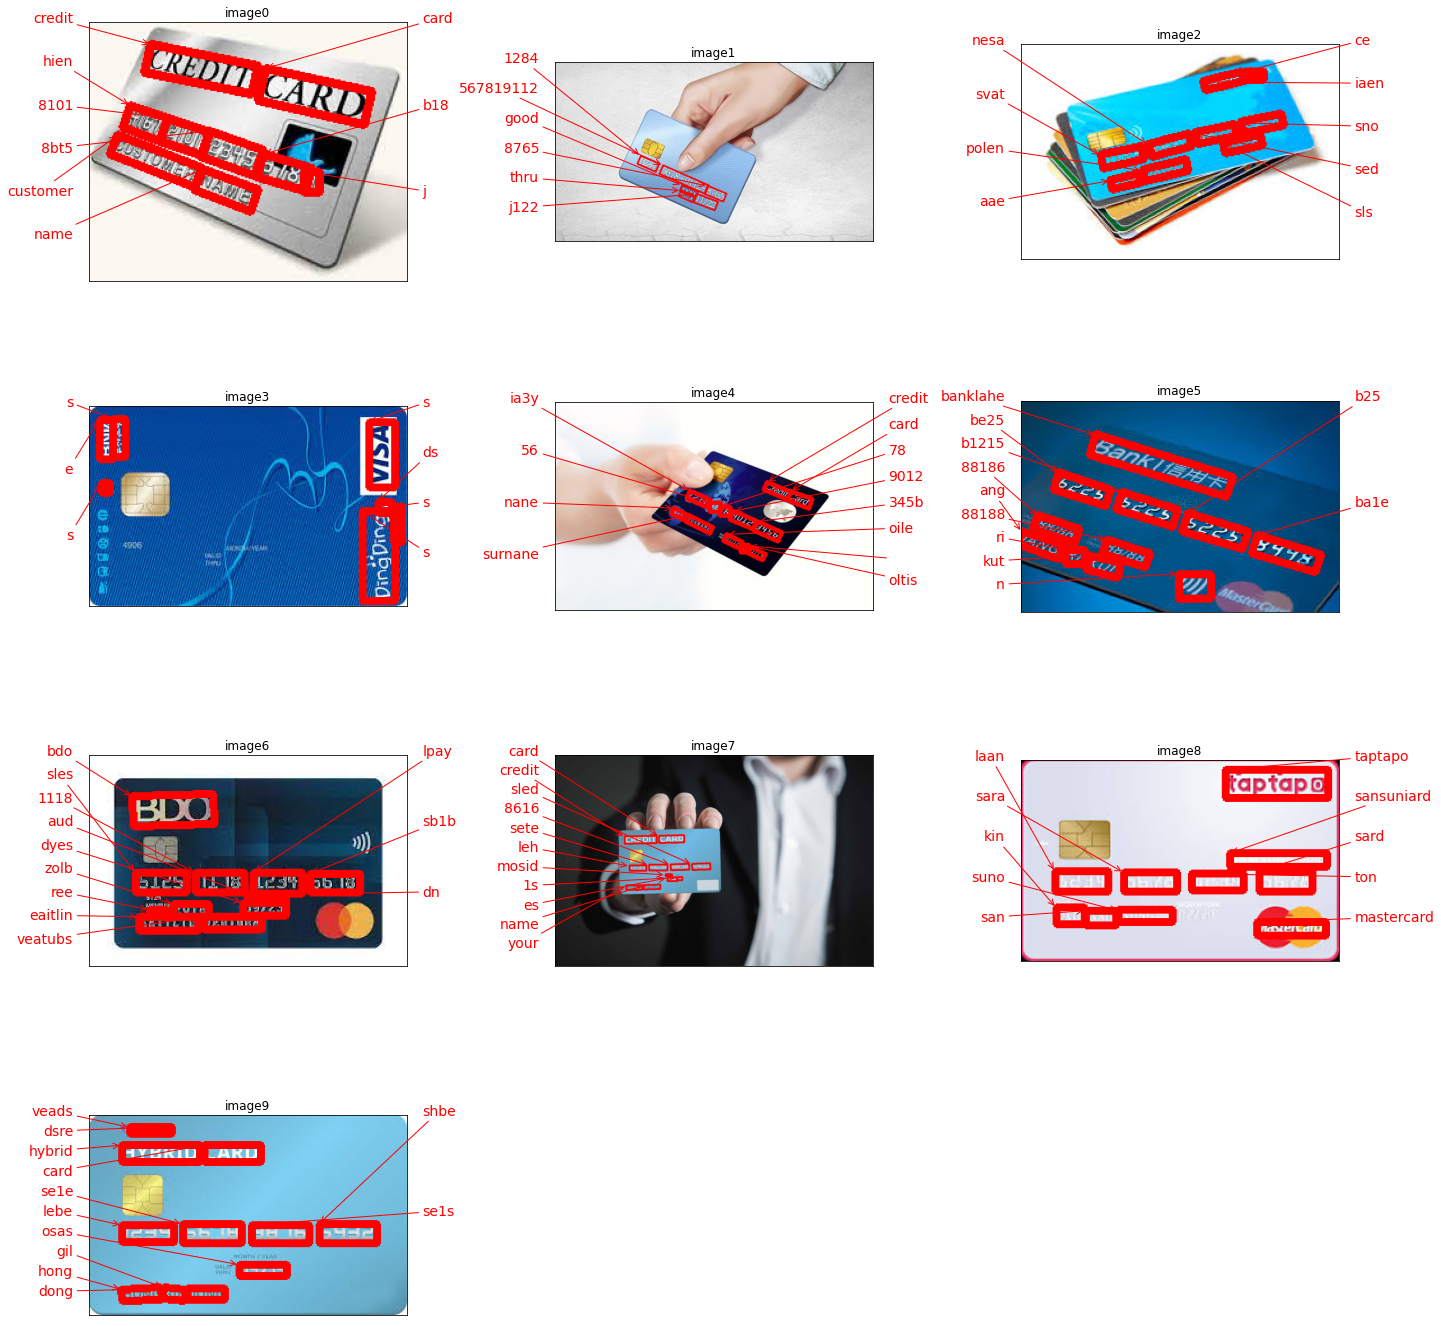

In [140]:
# Plot the predictions
fig = plt.figure(figsize=(20, 20))
for idx in range(len(images)):
    ax = fig.add_subplot(4,3, idx+1)
    keras_ocr.tools.drawAnnotations(image=images[idx], 
                                    predictions=prediction_groups[idx][0], ax =ax)

    ax.set_title(f'image{idx}')
plt.tight_layout()
plt.show()

### Tesseract-ocr

In [9]:
# ! sudo apt install tesseract-ocr
# ! sudo apt install libtesseract-dev
# ! pip list | grep pytesseract

In [143]:
import os
import pytesseract
from PIL import Image
from pytesseract import Output
import matplotlib.pyplot as plt

# OCR Engine modes(–oem):
# 0 - Legacy engine only.
# 1 - Neural nets LSTM engine only.
# 2 - Legacy + LSTM engines.
# 3 - Default, based on what is available.

# Page segmentation modes(–psm):
# 0 - Orientation and script detection (OSD) only.
# 1 - Automatic page segmentation with OSD.
# 2 - Automatic page segmentation, but no OSD, or OCR.
# 3 - Fully automatic page segmentation, but no OSD. (Default)
# 4 - Assume a single column of text of variable sizes.
# 5 - Assume a single uniform block of vertically aligned text.
# 6 - Assume a single uniform block of text.
# 7 - Treat the image as a single text line.
# 8 - Treat the image as a single word.
# 9 - Treat the image as a single word in a circle.
# 10 - Treat the image as a single character.
# 11 - Sparse text. Find as much text as possible in no particular order.
# 12 - Sparse text with OSD.
# 13 - Raw line. Treat the image as a single text line, bypassing hacks that are Tesseract-specific.

def crop_word_regions(image_path='./images/sample.png', output_path='./output'):
    if not os.path.exists(output_path):
        os.mkdir(output_path)
    custom_oem_psm_config = r'--oem 3 --psm 3'
    image = Image.open(image_path)

    recognized_data = pytesseract.image_to_data(
        image, lang='eng',    # 한국어라면 lang='kor'
        config=custom_oem_psm_config,
        output_type=Output.DICT
    )
    
    top_level = max(recognized_data['level'])
    index = 0
    cropped_image_path_list = []
    for i in range(len(recognized_data['level'])):
        level = recognized_data['level'][i]
    
        if level == top_level:
            left = recognized_data['left'][i]
            top = recognized_data['top'][i]
            width = recognized_data['width'][i]
            height = recognized_data['height'][i]
            
            output_img_path = os.path.join(output_path, f"{str(index).zfill(4)}.png")
            print(output_img_path)
            cropped_image = image.crop((
                left,
                top,
                left+width,
                top+height
            ))
            cropped_image.save(output_img_path)
            cropped_image_path_list.append(output_img_path)
            index += 1
    return cropped_image_path_list


# work_dir = os.getenv('HOME')+'/aiffel/ocr_python'
# img_file_path = work_dir + '/test.jpeg'   #테스트용 이미지 경로입니다. 본인이 선택한 파일명으로 바꿔주세요. 

# cropped_image_path_list = crop_word_regions(img_file_path, work_dir)

In [153]:
work_dir = os.getenv('HOME')+'/aiffel/ocr_python'

cropped_image_path_list = crop_word_regions(img_path[2], work_dir)

/aiffel/aiffel/ocr_python/0000.png


In [154]:
cropped_image_path_list

['/aiffel/aiffel/ocr_python/0000.png']

In [155]:
def recognize_images(cropped_image_path_list):
    custom_oem_psm_config = r'--oem 3 --psm 7'
    
    for image_path in cropped_image_path_list:
        image = Image.open(image_path)
        recognized_data = pytesseract.image_to_string(
            image, lang='eng',    # 한국어라면 lang='kor'
            config=custom_oem_psm_config,
            output_type=Output.DICT
        )
        print(recognized_data['text'])
    print("Done")

# 위에서 준비한 문자 영역 파일들을 인식하여 얻어진 텍스트를 출력합니다.
recognize_images(cropped_image_path_list)

Ge i

Done


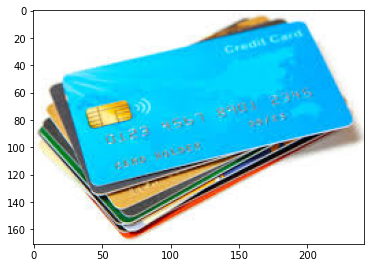

In [156]:
fig = plt.figure(figsize=(10,10))
for i, img in enumerate(cropped_image_path_list) :
    img = PIL.Image.open(img)
    ax = fig.add_subplot(2,2,i+1)
    plt.imshow(img)
plt.tight_layout()
plt.show()

## Step3. 테스트 결과 정리

## Step4. 결과 분석과 결론 제시

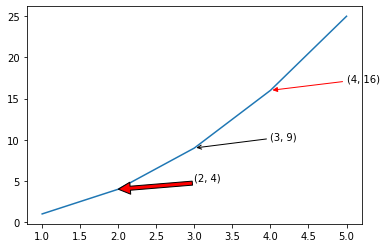

In [41]:
import matplotlib.pyplot as plt

# Generate some data to plot
x = [1, 2, 3, 4, 5]
y = [1, 4, 9, 16, 25]

# Create a figure and axis
fig, ax = plt.subplots()

# Plot the data
ax.plot(x, y)

# Annotate the point (2, 4) with a red arrow
ax.annotate('(2, 4)', (2, 4), xytext=(3, 5), arrowprops={'facecolor': 'red'})

# Annotate the point (3, 9) with a blue arrow and a round head
ax.annotate('(3, 9)', (3, 9), xytext=(4, 10), arrowprops={'facecolor': 'red', 'arrowstyle': '->'})

# Annotate the point (4, 16) with a green arrow and a square head
ax.annotate('(4, 16)', (4, 16), xytext=(5, 17), arrowprops={'arrowstyle': '-|>', 'color': 'red'})

# Show the plot
plt.show()

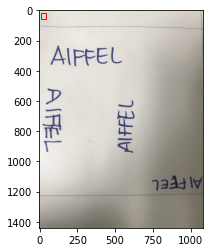

In [43]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

# Load an image and display it
img = plt.imread(img_path[0])
plt.imshow(img)

# Define the bounding box coordinates and dimensions
x, y, w, h = 10, 20, 30, 40

# Create the bounding box patch
rect = Rectangle((x, y), w, h, linewidth=1, edgecolor='r', facecolor='none')

# Add the patch to the current axis
plt.gca().add_patch(rect)

# Show the plot
plt.show()